In [18]:
#!pip install -U fastai

In [19]:
#!pip install -U duckduckgo-search fastcore

In [20]:
from duckduckgo_search import DDGS
from fastcore.all import *
import time, json


In [21]:
# Function to search and return image URLs
def search_images(keywords, max_images=200):
    with DDGS() as ddgs:
        results = ddgs.images(keywords, max_results=max_images)
        return L(results).itemgot('image')  # Extract only the image URLs

In [22]:
image_urls = search_images("cute puppies", max_images=10)
print(image_urls)

['http://www.pixelstalk.net/wp-content/uploads/2016/08/Cute-Puppies-Dog-Wallpaper.jpg', 'https://wallpaperaccess.com/full/1123322.jpg', 'https://www.rd.com/wp-content/uploads/2018/02/09_Adorable-Puppy-Pictures-that-Will-Make-You-Melt_344136443_unbrokenworld.jpg', 'https://getwallpapers.com/wallpaper/full/e/e/f/115964.jpg', 'https://www.thesprucepets.com/thmb/VvPj9X7mVfGhMjyBVJrgnOJbw5Q=/1080x0/filters:no_upscale():max_bytes(150000):strip_icc()/33226305_2114268482151169_1429930454064037888_n-5bae1f1d4cedfd0026a66902.jpg', 'https://wallpaperaccess.com/full/3585080.jpg', 'https://www.pixelstalk.net/wp-content/uploads/2016/08/Free-Cute-Puppy-Wallpaper-Download.jpg', 'http://getwallpapers.com/wallpaper/full/c/b/7/115912.jpg', 'https://wallpaperaccess.com/full/2969912.jpg', 'https://www.rd.com/wp-content/uploads/2021/03/GettyImages-1133605325-scaled-e1617227898456.jpg']


In [23]:
#!pip install -U fastcore fastai fastdownload

In [24]:
from fastdownload import download_url
from fastai.vision.all import *
from PIL import Image

Found image URL: http://www.publicdomainpictures.net/pictures/60000/velka/bird-1382262607iEg.jpg


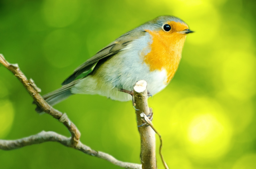

In [25]:

# Imports
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from PIL import Image

# Search function to get image URLs
def search_images(keywords, max_images=1):
    with DDGS() as ddgs:
        results = ddgs.images(keywords, max_results=max_images)
        return L(results).itemgot('image')

# Get a bird image
bird_urls = search_images("bird", max_images=1)
print(f"Found image URL: {bird_urls[0]}")

# Download the image
bird_dest = 'bird.jpg'
download_url(bird_urls[0], bird_dest, show_progress=False)

# Open and preview the image
im_bird = Image.open(bird_dest)
im_bird.to_thumb(256, 256)



Found image url: https://wallpaperaccess.com/full/2428648.jpg


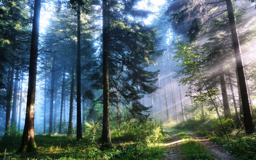

In [26]:

#Get a forest image
forest_urls = search_images("forest", max_images = 1)
print(f"Found image url: {forest_urls[0]}")

#Download the iamge
forest_dest = "forest.png"
download_url(forest_urls[0], forest_dest, show_progress = False)

#Open and view the image
im_forest = Image.open(forest_dest)
im_forest.to_thumb(256, 256)

In [28]:
searches = 'forest','bird', 'lakes', 'cow'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images(f'{o} photo', max_images= 50)
    download_images(dest, urls=urls)
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [29]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

In [30]:
# Check if the path exists and list the files in it
print(path.exists())  # Should print True if the path exists
print([f for f in path.iterdir()])  # List contents of the path


True
[Path('bird_or_not/lakes'), Path('bird_or_not/cow'), Path('bird_or_not/forest'), Path('bird_or_not/bird')]


In [31]:
# Check if `get_image_files` is retrieving files
image_files = get_image_files(path)
print(len(image_files))  # Should print the number of images
print(image_files[:5])   # Print first 5 image file paths

512
[Path('bird_or_not/lakes/814ce5fa-ca71-47b6-8c97-652728d16d4c.jpg'), Path('bird_or_not/lakes/ba3960ac-c662-4ca5-a2cf-43778b35ed76.jpg'), Path('bird_or_not/lakes/6dcd51c3-2e8e-4328-b723-187ca3fd0bf9.jpg'), Path('bird_or_not/lakes/fb860462-e056-42d3-840b-c1b915a0e891.jpg'), Path('bird_or_not/lakes/746cdb2e-3aed-4593-ac2b-b64aa504b87a.jpg')]


In [32]:
# Check the label extraction
for img_path in image_files[:5]:
    print(parent_label(img_path))  # Should print labels based on the folder structure


lakes
lakes
lakes
lakes
lakes


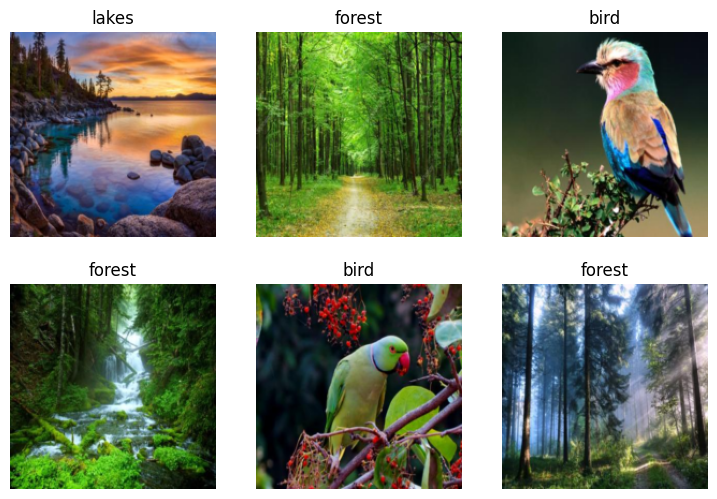

In [33]:
# Imports
from fastai.vision.all import *
from pathlib import Path

# Path to your dataset (change if needed)
path = Path('bird_or_not')

# Data loading
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),                # Images and labels
    get_items=get_image_files,                         # Get all image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),   # Train/validation split
    get_y=parent_label,                                # Label = parent folder name
    item_tfms=[Resize(192, method='squish')]           # Resize images to 192x192
).dataloaders(path, bs=32)                             # Batch size = 32

# Show some training images
dls.show_batch(max_n=6)

In [34]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.202969,0.121722,0.058824,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.082698,0.002924,0.000000,01:34
1,0.054122,0.000351,0.000000,01:17
2,0.032697,0.000196,0.000000,01:17


In [38]:
is_bird,_,probs = learn.predict(PILImage.create('forest.png'))
print(f'This is a {is_bird}')
print(f"The probability that this is a bird is :{probs[0]:.4f}")

This is a forest
The probability that this is a bird is :0.0000
